# Project Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Python Class Project/foodhub_order.csv')

In [ ]:
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The dataset has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Get the number of rows and columns from the dataset
df.shape

(1898, 9)

#### Observations:
There are 1898 (rows 0-1897) rows and 9 columns present in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are multiple data types in the dataset.

5 numerical data types:
*   (int64) columns: Order_id, customer_id, food_preparation_time, delivery_time
*   (float64) column: Cost_of_the_order

4 categorical data types:

*   restaurant_name, cuisine_type, day_of_the_week, rating

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for the number of missing values in the data
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Statistical outline of the dataset
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The food preparation times in Minutes are as follows:

*   Minimum: 20
*   Maximum: 35
*   Average: 27

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Count the occurrences of each unique value in the rating column
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
There are 736 orders that were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Observations on Numerical Data

In [ ]:
# Count of unique order IDs
df['order_id'].nunique()

1898

In [ ]:
# Count of unique customer IDs
df['customer_id'].nunique()

1200

There are 1898 unique orders placed by 1200 different customers, which means that some customers have ordered multiple times.

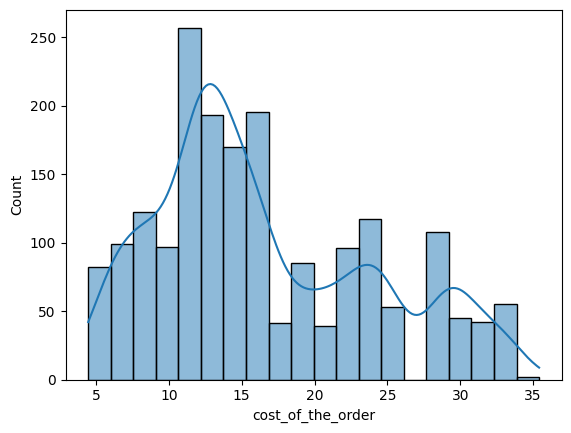

In [ ]:
# Generate a histogram for the cost of the order
sns.histplot(data=df, x='cost_of_the_order', bins=20, kde=True)
plt.show()

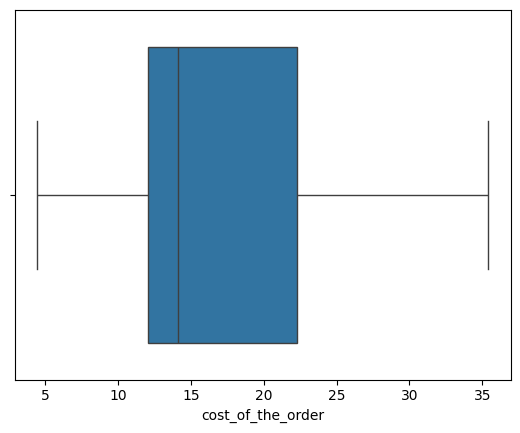

In [ ]:
# Create a box plot for the cost of the orders
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

Cheaper orders are more common and while the most common orders cost between 5 and 20 dollars.

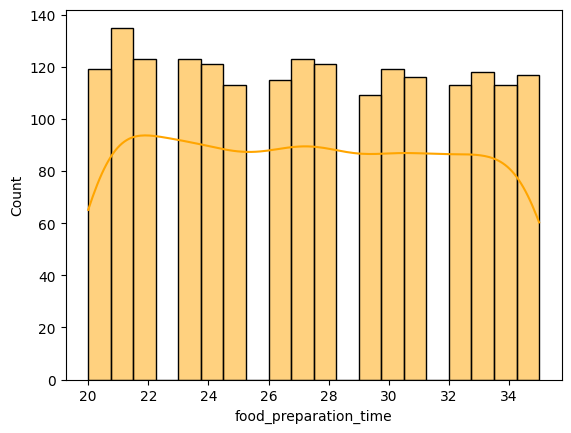

In [ ]:
# Create a histogram for food preparation time of orders
sns.histplot(data=df, x='food_preparation_time', bins=20, kde=True, color='orange')
plt.show()

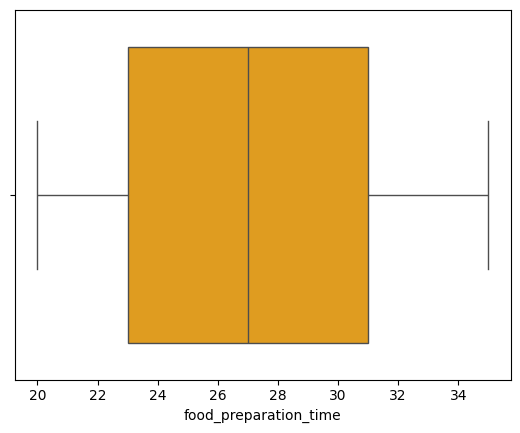

In [ ]:
# Create a boxplot for food preparation time of orders
sns.boxplot(data=df, x='food_preparation_time', color='orange')
plt.show()

Most orders take between 20 to 35 minutes for food preparation. No significant outliers which means food preparation times are relatively consistent.

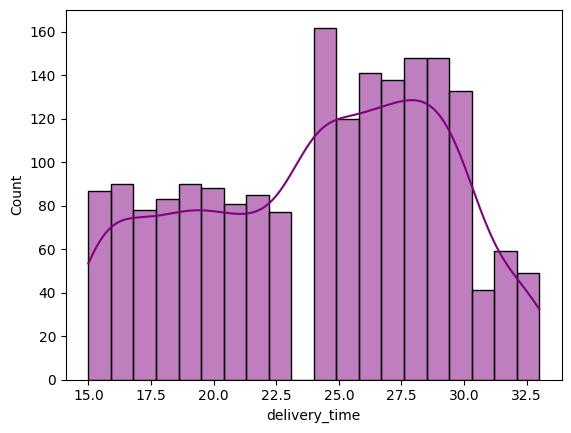

In [ ]:
# Create a histogram for delivery time of orders
sns.histplot(data=df, x='delivery_time', bins=20, kde=True, color='purple')
plt.show()

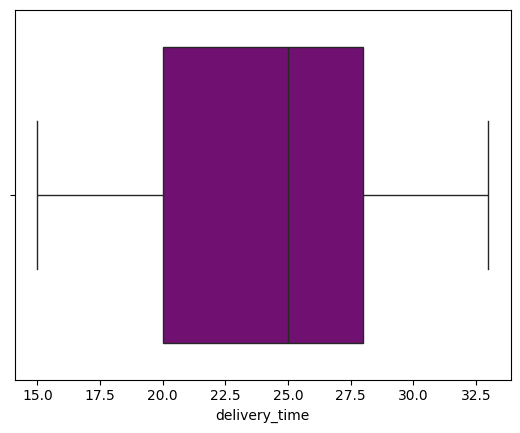

In [ ]:
# Create a box plot for delivery time of orders
sns.boxplot(data=df, x='delivery_time', color='purple')
plt.show()

Delivery times are typically between 20 and 28 minutes and there are no outliers, suggesting that delivery times are consistent.

Observations on Categorical Data

In [ ]:
# Count of unique restuarants
df['restaurant_name'].nunique()

178

In [ ]:
# Count of unique cuisines
df['cuisine_type'].nunique()

14

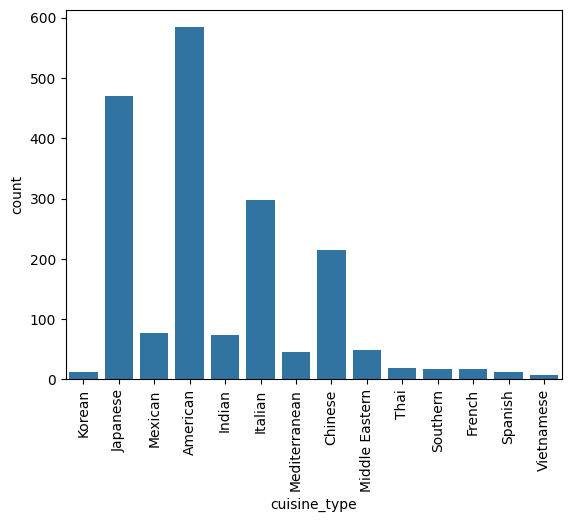

In [ ]:
# Create a count plot for cuisine types showing the most popular
sns.countplot(data=df, x='cuisine_type')

# Rotate the x-axis labels to fit graph
plt.xticks(rotation=90)

# Shows the generated countplot
plt.show()

There are 178 unique restaurants and 14 unique cuisines in the dataset.  American, Japanese and Italian are the three most popular.

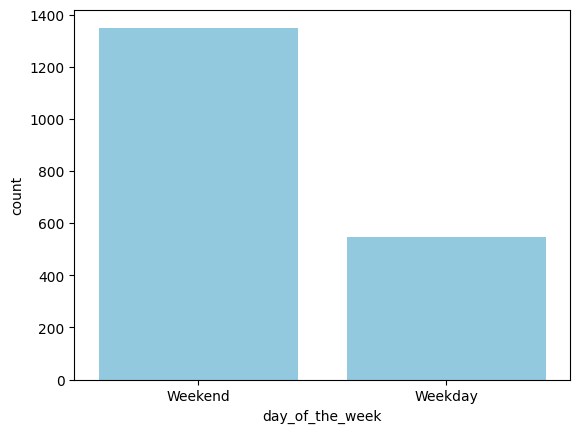

In [ ]:
# Create a count plot for days of the week showing orders on days versus weekends.
sns.countplot(data=df, x='day_of_the_week', order=df['day_of_the_week'].value_counts().index, color='skyblue')
plt.show()

Based on the count of orders more than twice the amount of orders are placed on weekends instead of weekdays.

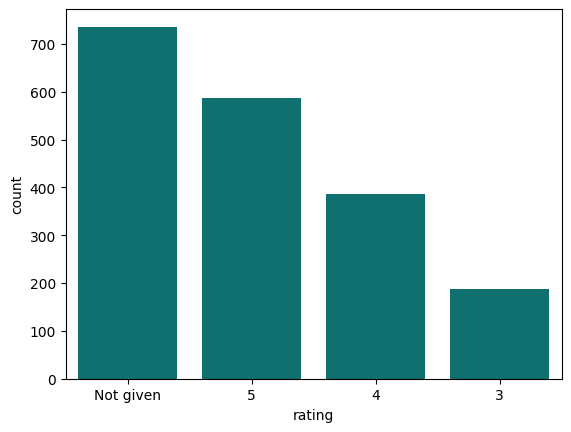

In [ ]:
# Create a count plot for the ratings showing the ratings versus order count
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index,color='teal')
plt.show()

A large part of ratings resulted in "Not given - therefore we cannot utilize ratings accurately across all orders.
When ratings are present 5 is the most common followed by 4 and then 3.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Find the top 5 restaurants by order count
top_5_restaurants = df.groupby('restaurant_name')['order_id'].count().nlargest(5)

# Show the results
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:
Above we can see that the 5 most popular restaurants in terms of the number of orders received.  Shake Shake Shake is much higher than the remaining 4 top locations.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter the day_of_the_week to only show 'Weekend'
weekend = df[df['day_of_the_week'] == 'Weekend']

# Count cuisine_type and filter the top 3 most common on Weekends.
top_3 = weekend['cuisine_type'].value_counts().head(3)

# Show the top 3 most popular
print(top_3)

cuisine_type
American    415
Japanese    335
Italian     207
Name: count, dtype: int64


#### Observations:
Above we can see that American is the most popular while Japanes and Italian are the second and third most popular.  This matches with the countplot above.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Find the orders in 'cost_of_the_order' which are greater than 20, calculate the average and multiply the result by 100 to convert it to a percentage.
(df['cost_of_the_order'] > 20).mean() * 100

29.24130663856691

#### Observations:
29.24% of the orders cost more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Find the average of the delivery times.
df.delivery_time.mean()

24.161749209694417

#### Observations:
The average delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Count the occurrences of each unique value in the 'customer_id' column and displays the top 5 customers and the count of their orders.
df['customer_id'].value_counts().head(5)

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


#### Observations:
The above list shows the top customers that have ordered the most.  These customers would receive the 20% discount vouchers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


###Understanding the data frames utilized in the below analysis:

*  **df** - Original data set including the following numeric and categorial columns.

1.   Numeric: order_id, customer_id, food_preparation_time, delivery_time, cost_of_the_order
2.   Categorical: restaurant_name, cuisine_type, day_of_the_week, rating

* **df_analysis** - A working copy of the original DataFrame (df), created to preserve the original data while performing analysis.

1.      A new column, total_time, is created by summing up delivery_time and food_preparation_time to give a better understanding of the entire order timeframe.
2.   Specific columns (cost_of_the_order, delivery_time, food_preparation_time, rating, total_time) are converted to numeric format.
3.   **Updated Not Given to a numeric value (0) in the 'rating' column**



In [ ]:
# Create a copy of the DataFrame for analysis to preserve the original data
df_analysis = df.copy()

# Calculate total time for each order
df_analysis["total_time"] = df_analysis["delivery_time"] + df_analysis["food_preparation_time"]

# Convert columns to numeric where required
numeric_columns = ['cost_of_the_order', 'delivery_time', 'food_preparation_time', 'rating', 'total_time']
df_analysis[numeric_columns] = df_analysis[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values
# Update Not Given to a numeric value (0) in the 'rating' column
df_analysis['rating'] = df_analysis['rating'].fillna(0)  # Assuming 0 represents "Not Given"

In [ ]:
df_analysis.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,total_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,2.659642,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,7.483812,2.195280,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,4.470000,0.000000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,0.000000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,14.140000,4.000000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000,68.000000


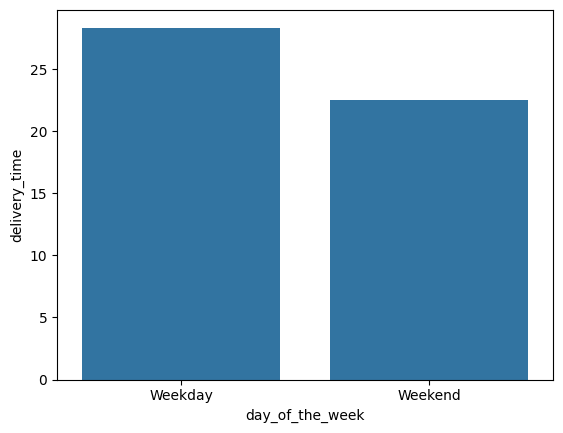

In [ ]:
# Bar Graph - Average Delivery Time by Day of the Week
# Show the average delivery time for each day of the week'

# Find the average delivery time by day of the week
avg_delivery = df_analysis.groupby('day_of_the_week', as_index=False)['delivery_time'].mean()

sns.barplot(data=avg_delivery, x='day_of_the_week', y='delivery_time')

# Show the bar graph
plt.show()

The average delivery time is higher on weekdays compared to weekends, which could be affected by different factors such as traffic, amount of staff, or others.

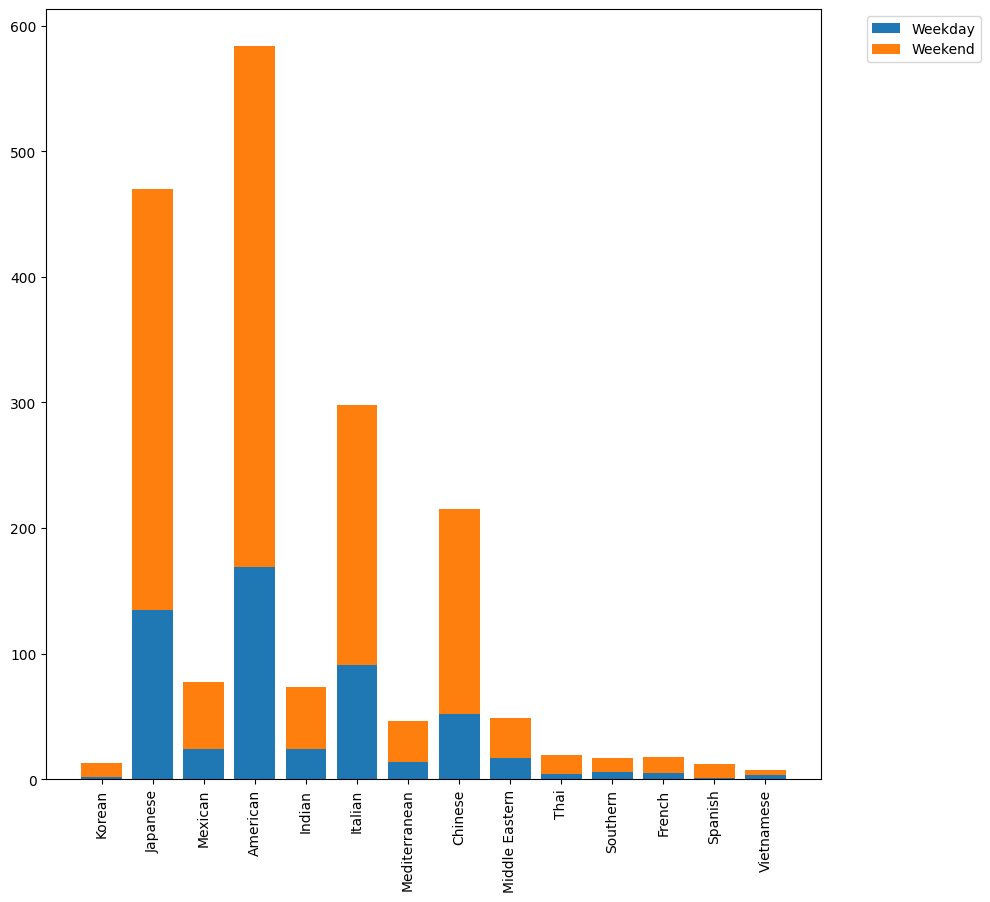

In [ ]:
# Bar Chart - Stacked version for Cuisine counts by Weekday vs Weekend
# Groups cuisine and counts the number of occurrences for Weekday and Weekend
df_barchart = df_analysis.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='count')

# Separate data for Weekday and Weekend
weekday_data = df_barchart[df_barchart['day_of_the_week'] == 'Weekday']
weekend_data = df_barchart[df_barchart['day_of_the_week'] == 'Weekend']

# Ensure all cuisines are represented in both datasets
all_cuisines = df_analysis['cuisine_type'].unique()
weekday_data = weekday_data.set_index('cuisine_type').reindex(all_cuisines, fill_value=0).reset_index()
weekend_data = weekend_data.set_index('cuisine_type').reindex(all_cuisines, fill_value=0).reset_index()

# Define x positions
x = range(len(all_cuisines))  # One bar for each cuisine

# Plot the stacked bar chart
plt.figure(figsize=(10, 10))
plt.bar(x, weekday_data['count'], label='Weekday')  # Stack for Weekday
plt.bar(x, weekend_data['count'], bottom=weekday_data['count'], label='Weekend')  # Stack for Weekend

# Add labels, title, and legend
plt.xticks(x, all_cuisines, rotation=90)  # Cuisine types as x-ticks
# Move the legend to the outside of the graph to easier read entire graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()

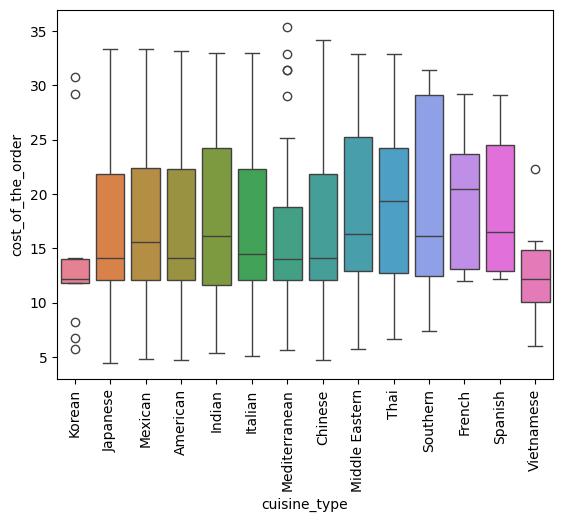

In [ ]:
# Boxplot - Cuisine vs. Cost of the Order
# Shows the distribution of the cost of the order versus cuisine type
sns.boxplot(data=df_analysis, x="cuisine_type", y="cost_of_the_order", hue="cuisine_type")

# Rotate the x-axis labels to fit graph
plt.xticks(rotation=90)

# Show the boxplot
plt.show()

Korean, Vietnamese, and Mexican cuisines are in the lowest cost ranges meaning they are generallly cheaper.

French, Italian, and Japanese cuisines are most expensive cuisines

American, Japanese, and Italian are the most popular cuisines on both weekdays and weekends.

Cuisines like Southern, French, Spanish, and Vietnamese have relatively low total counts, with only a slight increase on weekends.

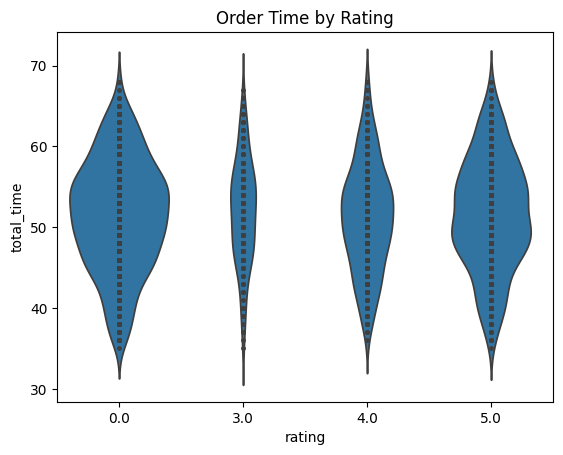

In [ ]:
# Violin Plot to show the distribution of total order time (preparation + delivery) per rating.
#0 represents orders that were "Not rated"
sns.violinplot(df_analysis, x='rating', y='total_time', density_norm='count', inner="point")
plt.title("Order Time by Rating")
plt.show()

The average time does not change much between ratings, meaning time is most likely not a factor on rating.

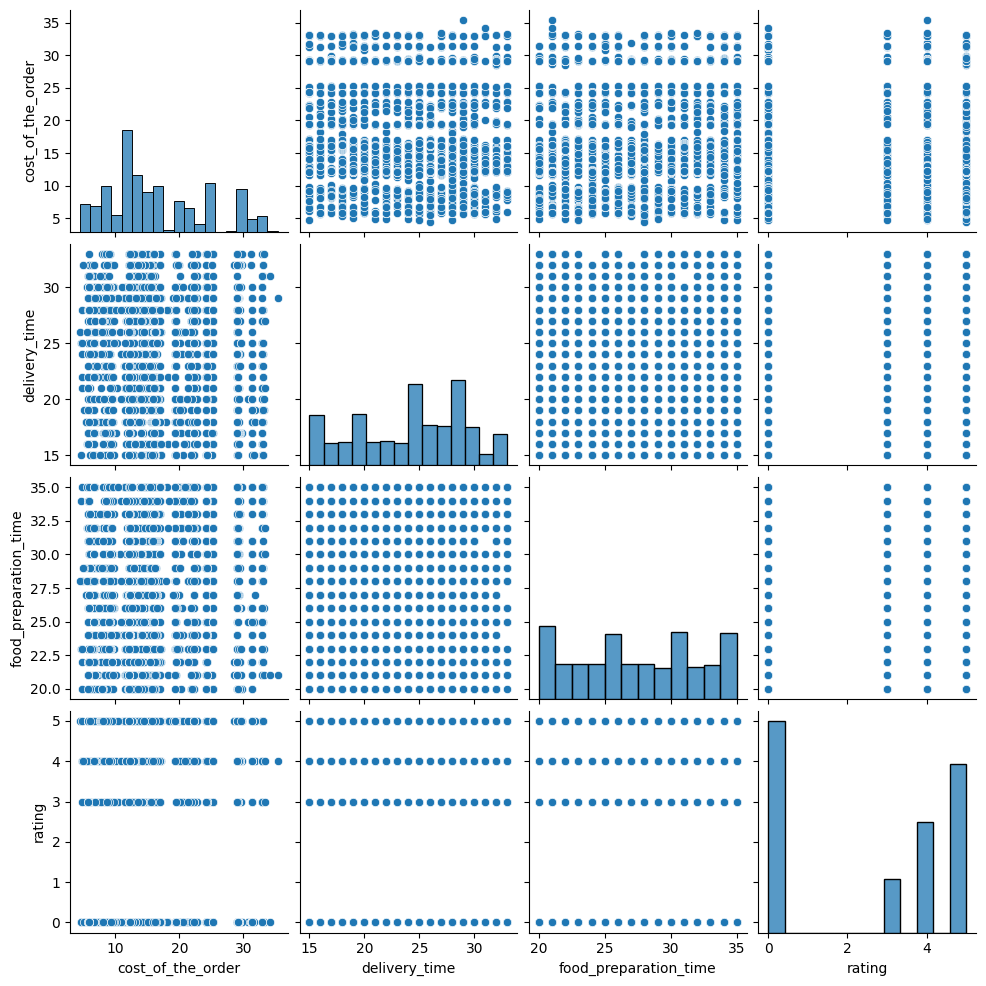

In [ ]:
# Pairplot - Relationships Between Numeric Variables
# This pairplot shows scatterplots for each pair of variables and histograms for their individual distributions
sns.pairplot(df_analysis[['cost_of_the_order', 'delivery_time', 'food_preparation_time', 'rating']])

# Show the pairplot
plt.show()

The pairplot shows no strong relationships between variables, and ratings might depend on other factors.

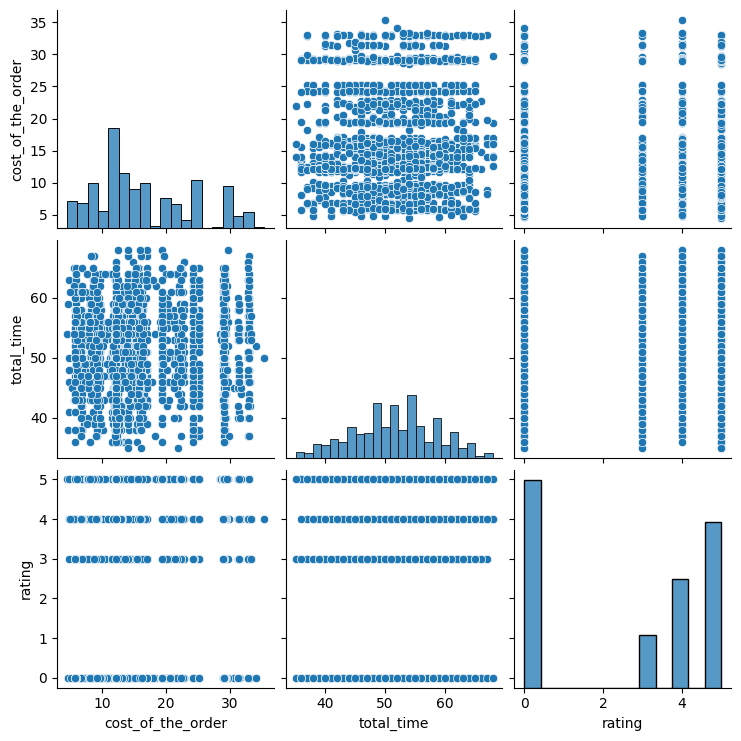

In [ ]:
# Pairplot - Relationships Between Numeric Variables
# This pairplot shows scatterplots for each pair of variables and histograms for their individual distributions
sns.pairplot(df_analysis[['cost_of_the_order', 'total_time', 'rating']])

# Show the pairplot
plt.show()

This updated plot that looks at total time of the order reinforces the fact that cost and time do not necessarily affect ratings.

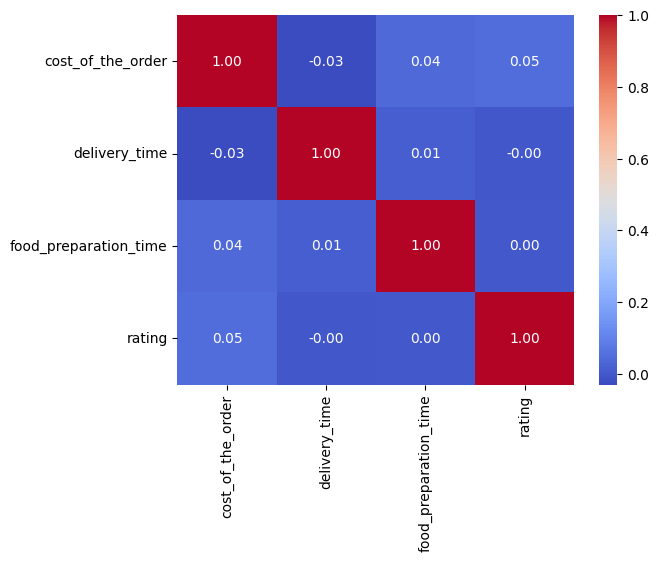

In [ ]:
# Heatmap - Correlation Matrix Cost, Delivery Time, Food Preparation Time & Rating.

# Calculate the correlation matrix of the specified numeric variables
corr_matrix = df_analysis[['cost_of_the_order', 'delivery_time', 'food_preparation_time', 'rating']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the heatmap
plt.show()

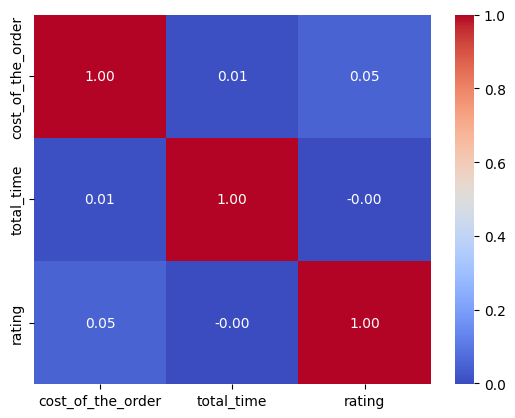

In [ ]:
# Heatmap - Correlation Matrix Cost, Total Time (Food Preparation + Delivery) & Rating.

# Calculate the correlation matrix of the specified numeric variables
corr_matrix = df_analysis[['cost_of_the_order', 'total_time', 'rating']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the heatmap
plt.show()

The above two heatmaps reinforce the fact that time and cost do not necessarily reflect customer ratings and there could be other factors involved.

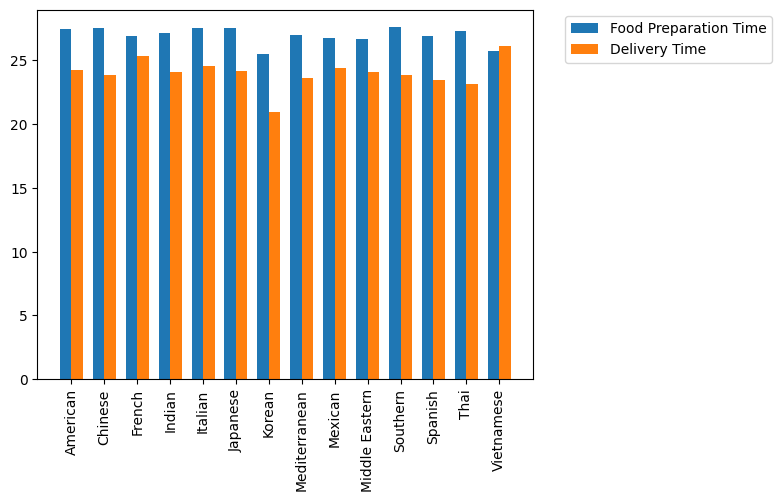

In [ ]:
# Bar Chart - Cuisine by Food Preparation Time and Food Delivery time.
# Groups cuisine and calculates the average of Food Preparation Time and Delivery Time
df_barchart = df_analysis.groupby('cuisine_type')[['food_preparation_time', 'delivery_time']].mean().reset_index()

#Ensure that cuisine is the x axis
x = np.arange(len(df_barchart['cuisine_type']))  # Create positions for each cuisine

# Define the width of the bars
width = 0.35  # Example width, adjust as needed

# Plot the bars
plt.bar(x - width/2, df_barchart['food_preparation_time'], width, label='Food Preparation Time')
plt.bar(x + width/2, df_barchart['delivery_time'], width, label='Delivery Time')

# Add labels, title, and legend
plt.xticks(x, df_barchart['cuisine_type'], rotation=90)  # Set x-ticks as cuisine types and rotate names for easier reading

# Move the legend for Food Preparation and Delivery Time to the outside of the graph to easier read entire graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()

There is very little variation in preparation and delivery times, however Thai has the highest food preparation and delivery times and Korean has the lowest.

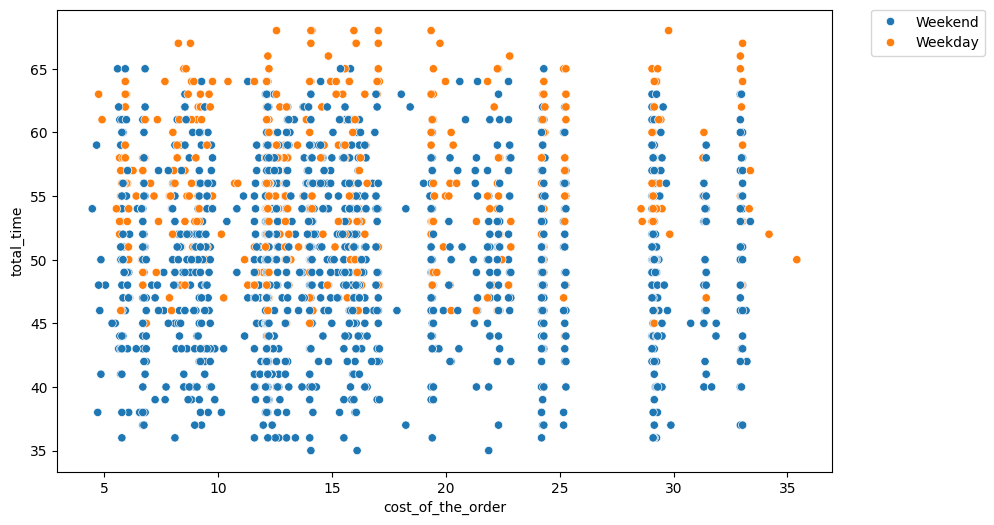

In [ ]:
# Scatterplot - Cost vs. Total Time on Weekdays versus Weekends
# Shows the relationship between the cost of the order and preparation plus delivery time colored by the day of the week

# Create a size graph for easier reading
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_analysis, x='cost_of_the_order', y='total_time', hue='day_of_the_week')

# Moves the legend for Weekday and Weekend to the outside of the graph to easier read entire graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the scatterplot
plt.show()

The total time remains relatively consistent across all order costs, with most points clustered between 40 and 65 minutes, regardless of cost or whether it's a weekday or weekend.

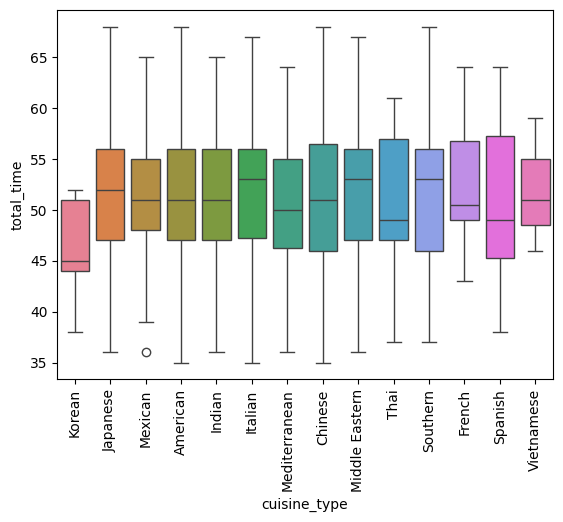

In [ ]:
# Boxplot - Cuisine Type vs. Total Time (Combination of Preparation & Delivery)
# Shows the distribution of food preparation times for each cuisine
sns.boxplot(df_analysis, x="cuisine_type", y="total_time", hue="cuisine_type")

# Rotate the x-axis labels to fit graph
plt.xticks(rotation=90)

# Show the graph
plt.show()

The overall time range for all cuisines lies approximately between 35 and 65 minutes.

Thai and French have a wider range in times so the difference in time changes more often.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Convert ratings to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Filter restaurants with more than 50 ratings and average rating > 4
offer = df.groupby('restaurant_name').filter(
    lambda x: x['rating'].count() > 50 and x['rating'].mean() > 4
)['restaurant_name'].unique()

# Show the results
print(offer)

['Blue Ribbon Fried Chicken' 'The Meatball Shop' 'Shake Shack'
 'Blue Ribbon Sushi']


#### Observations:
The above list shows the 4 restaurants with more than 50 ratings and and average rating above 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculates the charge of 25% for orders over $20
# Add the charge of 15% for orders between $5 and $20
df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25 + df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

6166.303

#### Observations:
The net revenue generated based on the 25% charge of orders over 20 and 15% charge on orders between 5 and 20 is $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of the orders over 60.
percent = ((df['total_time'] > 60).mean() * 100)

# Show the percentage amount
print(percent)

10.537407797681771


#### Observations:
10.54% of orders take more than 60 minutes to be delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate average delivery time for weekdays and weekends.
weekday_avg = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_avg = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Calculate the difference in delivery times
time_difference = weekday_avg - weekend_avg

# Show the results
print(f"Weekday Average Delivery: {weekday_avg:.2f} minutes")
print(f"Weekend Average Delivery: {weekend_avg:.2f} minutes")

Weekday Average Delivery: 28.34 minutes
Weekend Average Delivery: 22.47 minutes


In [ ]:
# Calculate the difference between the Weekday and Weekend delivery time averages.
28.34 - 22.47

5.870000000000001

#### Observations:

There is a 5.87 minute difference between delivery times on weekdays compared to weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


*   The dataset contains 1898 orders from 1200 customers, with data on cost, cuisine type, ratings, preparation time, and delivery time.

*   There are 178 unique restaurants and 14 cuisine types, with American, Japanese, and Italian cuisines being the most popular both on weekends and weekdays.

*   Almost 30% of the orders cost more than $20, which means 70% of the orders are coming from cheaper options.

*   A large number of orders (736 out of the total of 1898) are not rated while among the rated orders, 5-star ratings are most common.

*   Food preparation times range between 20 to 35 minutes, while the average delivery time is 24.16 minutes. Delivery and preparation times are consistent across most orders.

*   Around 11% of orders take more than 60 minutes from order placement to delivery.

*   Shake Shack is the most ordered-from restaurant, followed by The Meatball Shop and Blue Ribbon Sushi.

### Recommendations:



FoodHub could promote less popular cuisines by offering discounts on the overall order, discounts when choosing certain dishes, free delivery.  Additionally they can highlight unique dishes in the app to encourage customers to try them.

FoodHub could also partner with more restaurants in the most popular categories (American, Japanese, Italian, Chinese) as these have already proven to be popular with customers and more options may bring in more business.

FoodHub could promote the most popular restaurants and cuisines to repeat customers upon opening the app, which may prompt those customers to easily find the restuarants or cuisines they prefer.

Weekends have more orders than weekdays, and delivery times are faster on weekends as well. To even things out, FoodHub could offer weekday discounts, guarantee faster delivery on weekdays, or give out loyalty points for weekday orders.

Almost 40% of orders don't have ratings. Giving discounts or loyalty points for leaving feedback could help collect more ratings and improve customer satisfaction.

Most orders are between 5 and 20 dollars, while less than 30% of them cost more than $20. FoodHub could partner with restaurants offering more expensive meals, promote more premium options to customers when they first launch the app, or offer perks like free delivery for orders over a certain amount to boost revenue.

Restaurants with long preparation, delivery or total order time might hurt repeat business. FoodHub should review these and decide if they would like to continue partner with the resturants and assist them with lowering their preparation and/or delivery times or if they want to sever these partnerships instead.